# Bank Churn 

## Aniruddha Purohit M
## ID: 916389626

In [160]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import sys
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score,precision_score,roc_auc_score

In [2]:
import numpy as np

In [3]:
#reading data
df = pd.read_csv('BankChurners-1.csv')

In [4]:
df.shape

(10127, 23)

In [5]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [6]:
#dropping unecessary columns
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis = 1)

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis = 1)

In [9]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
for col in df.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(X[col].cat.categories.to_list()))

In [11]:
#checking for missing values
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
df2_corr = df.corr()
df2_corr

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


## Visualizing data

<AxesSubplot:>

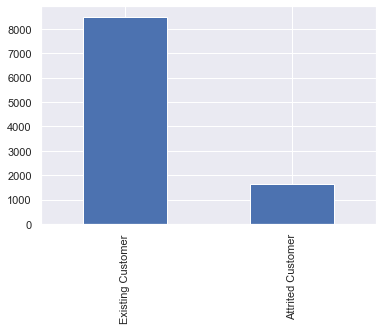

In [13]:
df['Attrition_Flag'].value_counts().plot.bar()

<AxesSubplot:>

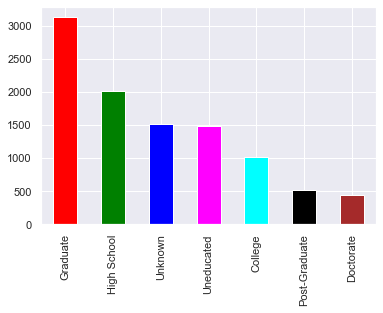

In [14]:
df['Education_Level'].value_counts().plot.bar(color = ['red','green','blue','magenta','cyan','black','brown'])

<AxesSubplot:ylabel='Gender'>

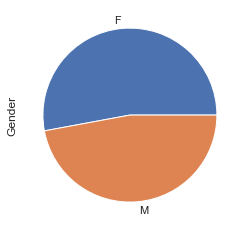

In [15]:
df['Gender'].value_counts().plot.pie()

In [16]:
ins, att = df.shape
ins


10127

In [17]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [18]:
#calculating correlation matrix
df_corr = df.corr()
df_corr

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [19]:
df1= df.rename(columns={'CLIENTNUM':'1', 'Attrition_Flag':'2', 'Customer_Age':'3', 'Gender':'4',
       'Dependent_count':'5', 'Education_Level':'6', 'Marital_Status':'7',
       'Income_Category':'8', 'Card_Category':'9', 'Months_on_book':'10',
       'Total_Relationship_Count':'11', 'Months_Inactive_12_mon':'12',
       'Contacts_Count_12_mon':'13', 'Credit_Limit':'14', 'Total_Revolving_Bal':'15',
       'Avg_Open_To_Buy':'16', 'Total_Amt_Chng_Q4_Q1':'17', 'Total_Trans_Amt':'18',
       'Total_Trans_Ct':'19', 'Total_Ct_Chng_Q4_Q1':'20', 'Avg_Utilization_Ratio':'21'})
df1.columns


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object')

In [20]:
df1_corr = df1.corr()
df1.corr()

,1,3,5,10,11,12,13,14,15,16,17,18,19,20,21
1,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
3,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
5,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
10,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
11,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
12,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
13,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
14,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
15,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
16,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [21]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<AxesSubplot:>

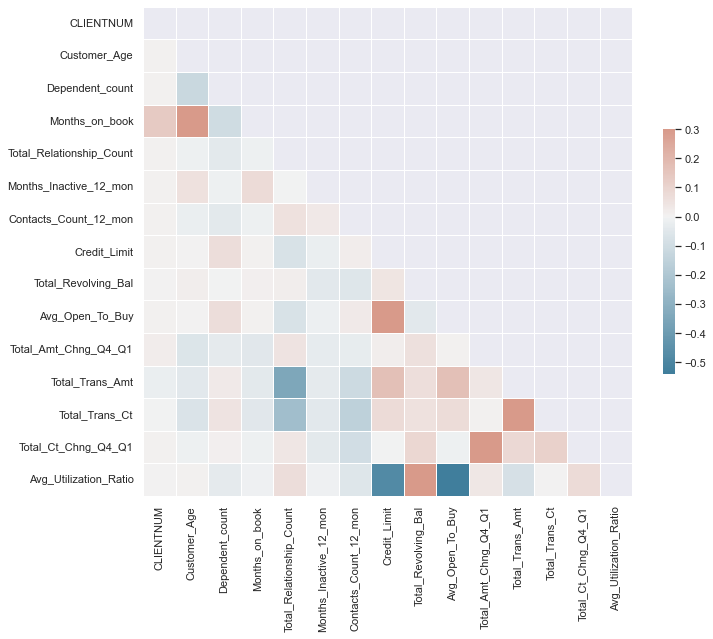

In [24]:
#plotting heatmap for correlation matrix
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

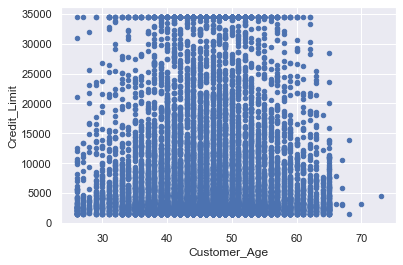

In [26]:
df.plot.scatter('Customer_Age', 'Credit_Limit')

In [27]:
df1 = pd.DataFrame(columns=['Income_Category','Attrition_Flag'], data = df)

In [28]:
df1.head()

,Income_Category,Attrition_Flag
0,$60K - $80K,Existing Customer
1,Less than $40K,Existing Customer
2,$80K - $120K,Existing Customer
3,Less than $40K,Existing Customer
4,$60K - $80K,Existing Customer


In [29]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot:ylabel='Frequency'>

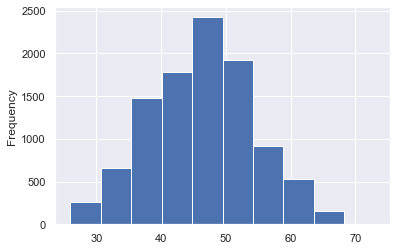

In [30]:
df['Customer_Age'].plot(kind='hist')

In [31]:
pd.cut(df['Customer_Age'],bins = 4).value_counts()

(37.75, 49.5]      5197
(49.5, 61.25]      3218
(25.953, 37.75]    1400
(61.25, 73.0]       312
Name: Customer_Age, dtype: int64

<AxesSubplot:>

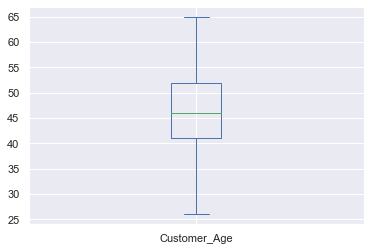

In [32]:
df.loc[df['Customer_Age'] > 65, 'Customer_Age'] = np.mean(df['Customer_Age'])
df['Customer_Age'].plot.box()

In [33]:
bins = [0,35,45,55,70]
cut_labels = ['0_35', '35_45', '45_55', '55_70']
df['Customer_Age'] = pd.cut(df['Customer_Age'], bins=bins, labels=cut_labels)

In [34]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,35_45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,45_55,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,45_55,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,35_45,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,35_45,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<AxesSubplot:>

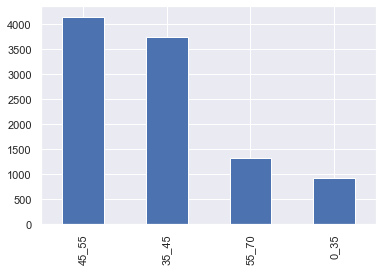

In [35]:
df['Customer_Age'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

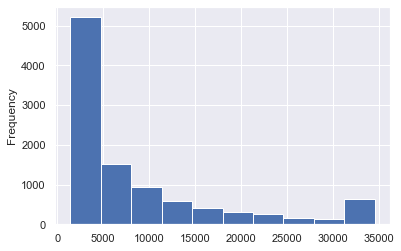

In [36]:
df['Credit_Limit'].plot(kind = 'hist')

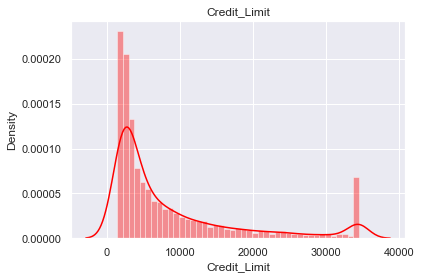

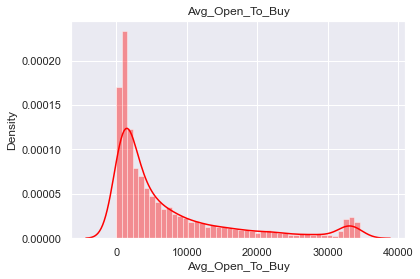

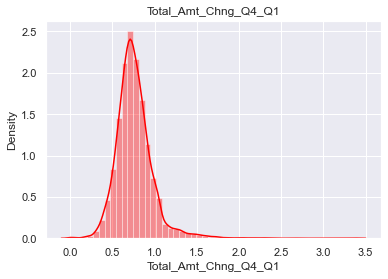

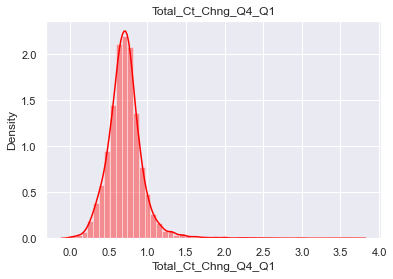

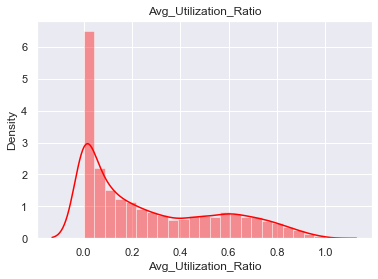

In [37]:
cont_attributes = df.select_dtypes(['float64']).columns.to_list()

for cont_attribute in cont_attributes: 
    plt.figure()
    plt.title(cont_attribute)
    ax = sns.distplot(df[cont_attribute], color = 'red')

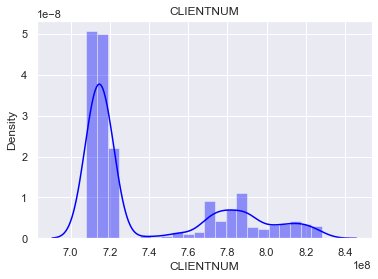

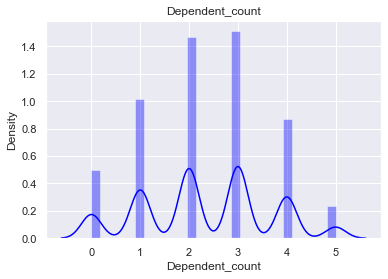

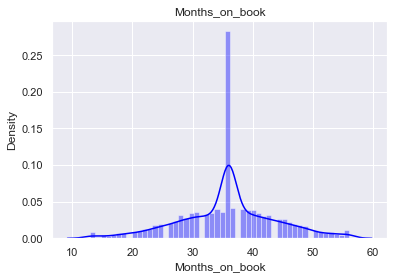

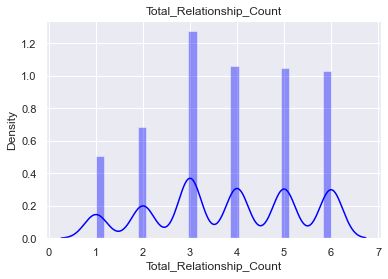

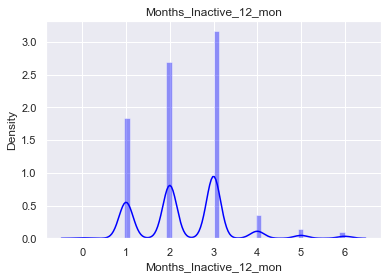

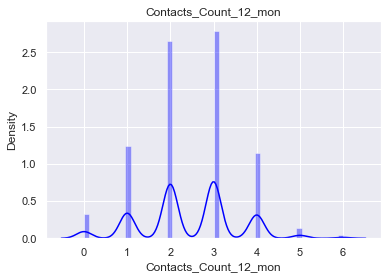

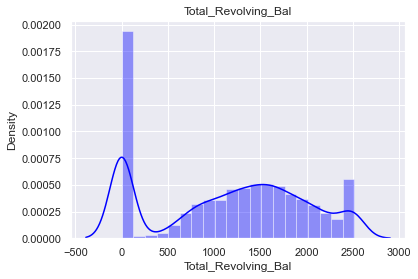

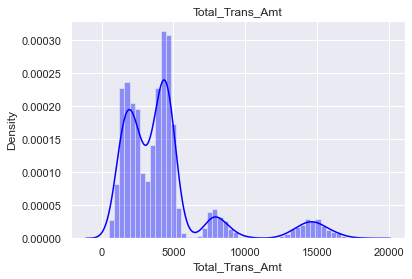

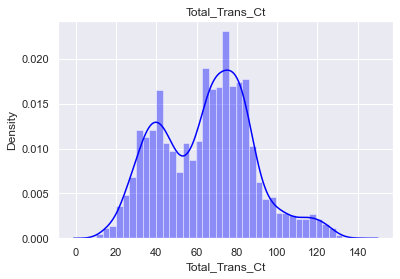

In [38]:
cont_attributes = df.select_dtypes(['int64']).columns.to_list()

for cont_attribute in cont_attributes: 
    plt.figure()
    plt.title(cont_attribute)
    ax = sns.distplot(df[cont_attribute], color = 'blue')

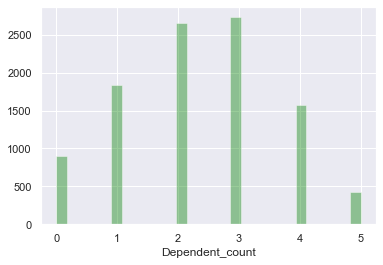

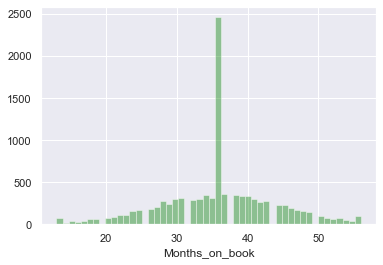

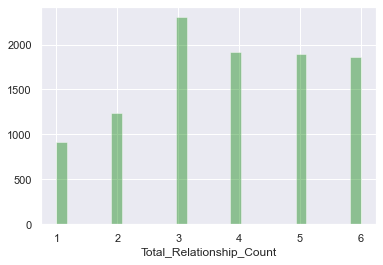

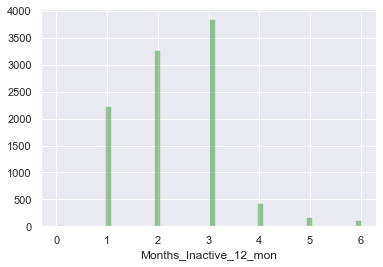

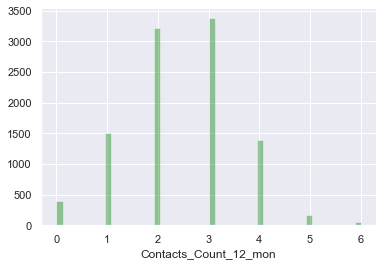

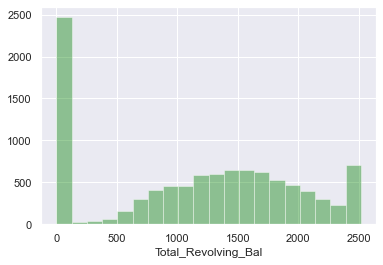

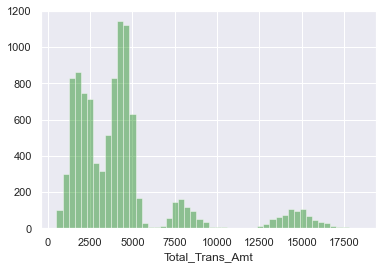

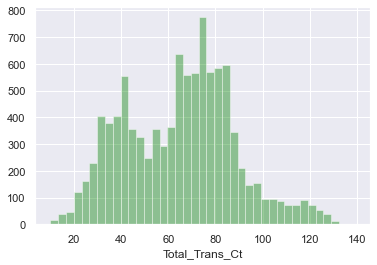

In [39]:
discrete_attributes = df.select_dtypes(['int64']).columns.to_list()

for disc_attribute in discrete_attributes:
    if not(disc_attribute == 'CLIENTNUM'):
        plt.figure()
        ax = sns.distplot(df[disc_attribute],kde = False, color = 'green')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  object  
 2   Customer_Age              10127 non-null  category
 3   Gender                    10127 non-null  object  
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [41]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [42]:
#labels = {'Existing Customer':'0','Attrited Customer':'1'}
#df['Attrition_Flag'] = df['Attrition_Flag'].map(labels)
#df.head()

<AxesSubplot:>

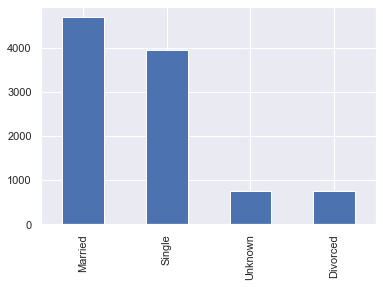

In [43]:
df['Marital_Status'].value_counts().plot(kind = 'bar')

In [44]:
#dropping duplicate records
df.drop_duplicates().head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,35_45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,45_55,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,45_55,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,35_45,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,35_45,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [45]:
df['Marital_Status'].replace(to_replace = 'Unknown', value = 'Single', inplace = True)


In [46]:
df['Marital_Status'].value_counts()

Single      4692
Married     4687
Divorced     748
Name: Marital_Status, dtype: int64

In [47]:
cat_types = ['bool','object','category']
data = df.copy()
data[data.select_dtypes(cat_types).columns] = data.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  category
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [49]:
labels = {'Existing Customer':'0','Attrited Customer':'1'}
data['Attrition_Flag'] = data['Attrition_Flag'].map(labels)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,35_45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,45_55,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,45_55,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,35_45,F,4,High School,Single,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,35_45,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [50]:
#Output and input variables
Y = data['Attrition_Flag']
X = data.drop('Attrition_Flag',axis = 1)

In [51]:
X.shape,Y.shape

((10127, 20), (10127,))

In [52]:
for col in X.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(X[col].cat.categories.to_list()))

Customer_Age: ['0_35', '35_45', '45_55', '55_70']
Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']


In [53]:
col_list = X.select_dtypes('category').columns.to_list()
col_list

['Customer_Age',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

## Preparing Data

### One-hot encoding

In [54]:
def encode_fun(dataframe,attributes):
    dummies = pd.get_dummies(dataframe[attributes])
    result = pd.concat([dataframe,dummies],axis =1)
    result = result.drop([attributes], axis=1)
    return(result)

In [55]:
col_list = X.select_dtypes('category').columns.to_list()
for col in col_list:
    X = encode_fun(X,col)

In [56]:
X.head()

,CLIENTNUM,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Blue,Gold,Platinum,Silver
0,768805383,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,818770008,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,713982108,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,769911858,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,709106358,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  0_35  

### Performing Stratified K-Fold split

In [58]:
def kfold_split(X,Y):
    skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    for train_index, test_index in skfold.split(X,Y):
        skf_X_train, skf_X_test = X.iloc[train_index], X.iloc[test_index]
        skf_Y_train, skf_Y_test = Y.iloc[train_index], Y.iloc[test_index]
        skf_X_train, skf_X_test, skf_Y_train, skf_Y_test = skf_X_train.values, skf_X_test.values, skf_Y_train.values, skf_Y_test.values
        return skf_X_train, skf_X_test, skf_Y_train, skf_Y_test

In [59]:
X_train, X_test, Y_train, Y_test = kfold_split(X,Y)

### Cross-validation function

In [171]:
from sklearn.model_selection import KFold
def cross_val_score_func(model,X,y):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Implementing models

## Decision tree

In [60]:

model1 = DecisionTreeClassifier(random_state=0)

In [61]:
model1.fit(X_train,Y_train)
model1.score(X_test,Y_test)

0.9259624876604146

In [62]:
model1.predict(X_test)

array(['0', '0', '1', ..., '0', '0', '0'], dtype=object)

In [63]:
pred1=model1.predict(X_test)
pred1[:10], model1.score(X_test, Y_test)

(array(['0', '0', '1', '1', '0', '0', '1', '0', '0', '1'], dtype=object),
 0.9259624876604146)

In [64]:
train_accuracy = []
test_accuracy = []
for d in range(1,10):
    model_test = DecisionTreeClassifier(max_depth=d, random_state=0)
    model_test.fit(X_train,Y_train)
    train_accuracy.append(model_test.score(X_train,Y_train))
    test_accuracy.append(model_test.score(X_test,Y_test))

In [65]:
test_res = pd.DataFrame({'max_depth':range(1,10),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
test_res

,max_depth,train_accuracy,test_accuracy
0,1,0.839368,0.839092
1,2,0.891705,0.900296
2,3,0.918697,0.923001
3,4,0.927035,0.929911
4,5,0.944152,0.930898
5,6,0.955234,0.934847
6,7,0.965109,0.942744
7,8,0.974984,0.941757
8,9,0.980689,0.940770


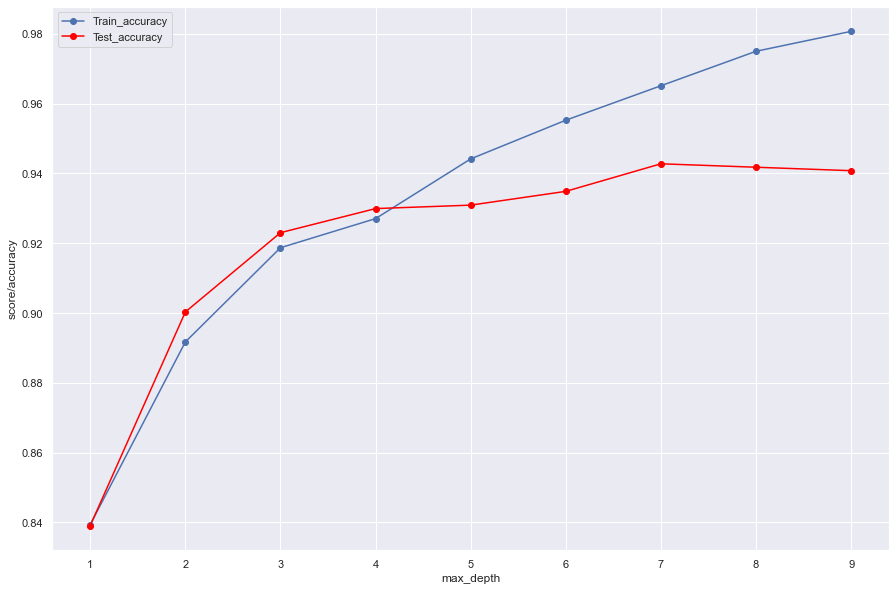

In [66]:
plt.figure(figsize=(15,10))
plt.plot(test_res['max_depth'],test_res['train_accuracy'],marker = 'o')
plt.plot(test_res['max_depth'],test_res['test_accuracy'],marker = 'o',color = 'red')
plt.xlabel('max_depth')
plt.ylabel('score/accuracy')
plt.legend(['Train_accuracy','Test_accuracy'])

### Hyper-parameter tuning

In [67]:
train_accuracy = []
test_accuracy = []
for rs in range(0,100):
    model_test = DecisionTreeClassifier(max_depth=5, random_state=rs)
    model_test.fit(X_train,Y_train)
    train_accuracy.append(model_test.score(X_train,Y_train))
    test_accuracy.append(model_test.score(X_test,Y_test))


In [68]:
test_res2 = pd.DataFrame({'random_state':range(0,100),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
test_res2.head()

,random_state,train_accuracy,test_accuracy
0,0,0.944152,0.930898
1,1,0.944152,0.930898
2,2,0.944152,0.930898
3,3,0.944152,0.929911
4,4,0.944152,0.930898


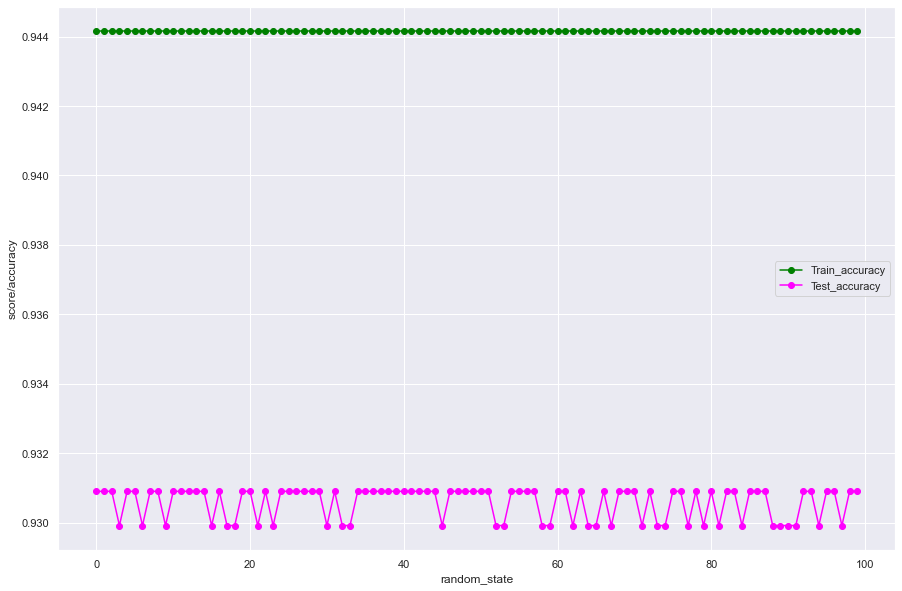

In [69]:
plt.figure(figsize=(15,10))
plt.plot(test_res2['random_state'],test_res2['train_accuracy'],marker = 'o',color = 'green')
plt.plot(test_res2['random_state'],test_res2['test_accuracy'],marker = 'o',color = 'magenta')
plt.xlabel('random_state')
plt.ylabel('score/accuracy')
plt.legend(['Train_accuracy','Test_accuracy'])

In [70]:
train_accuracy = []
test_accuracy = []
for leaf_nodes in range(2,30):
    model_test = DecisionTreeClassifier(max_depth=5, random_state=0, max_leaf_nodes=leaf_nodes)
    model_test.fit(X_train,Y_train)
    train_accuracy.append(model_test.score(X_train,Y_train))
    test_accuracy.append(model_test.score(X_test,Y_test))

In [71]:
test_res3 = pd.DataFrame({'max_leaf_nodes':range(2,30),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
test_res3.head()

,max_leaf_nodes,train_accuracy,test_accuracy
0,2,0.839368,0.839092
1,3,0.891705,0.900296
2,4,0.903665,0.909181
3,5,0.903665,0.909181
4,6,0.905859,0.910168


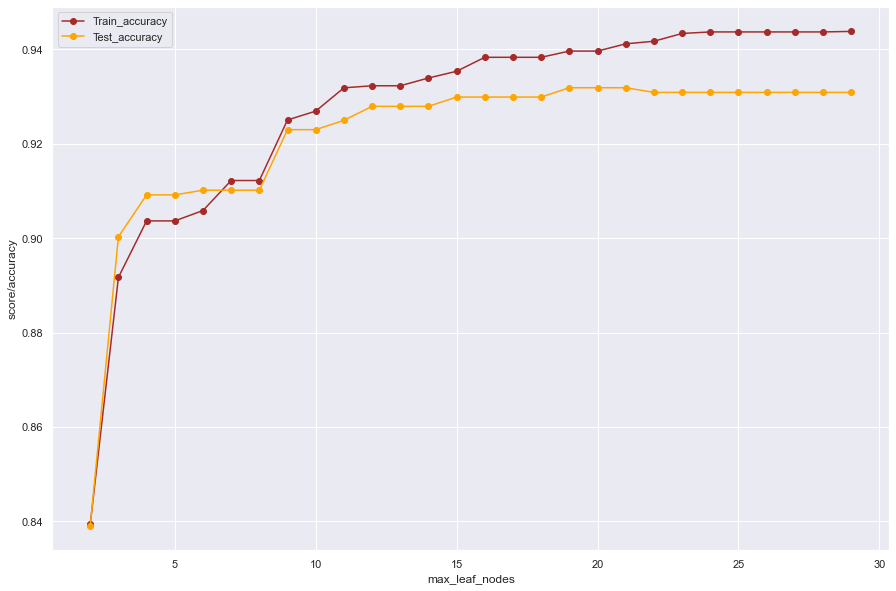

In [72]:
plt.figure(figsize=(15,10))
plt.plot(test_res3['max_leaf_nodes'],test_res3['train_accuracy'],marker = 'o',color = 'brown')
plt.plot(test_res3['max_leaf_nodes'],test_res3['test_accuracy'],marker = 'o',color = 'orange')
plt.xlabel('max_leaf_nodes')
plt.ylabel('score/accuracy')
plt.legend(['Train_accuracy','Test_accuracy'])

In [73]:
DT = DecisionTreeClassifier(max_depth=5,random_state=0,max_leaf_nodes=25)
DT.fit(X_train,Y_train)
DT_score = DT.score(X_test,Y_test)

In [74]:
DT_score

0.930898321816387

In [75]:
def cross_val_func(X, Y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, Y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, Y).score(X, Y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [76]:
def plot_cross_val_tree(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,10))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim()
    ax.set_xticks(depths)
    ax.legend()

In [77]:
td = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = cross_val_func(X_train, Y_train, td)

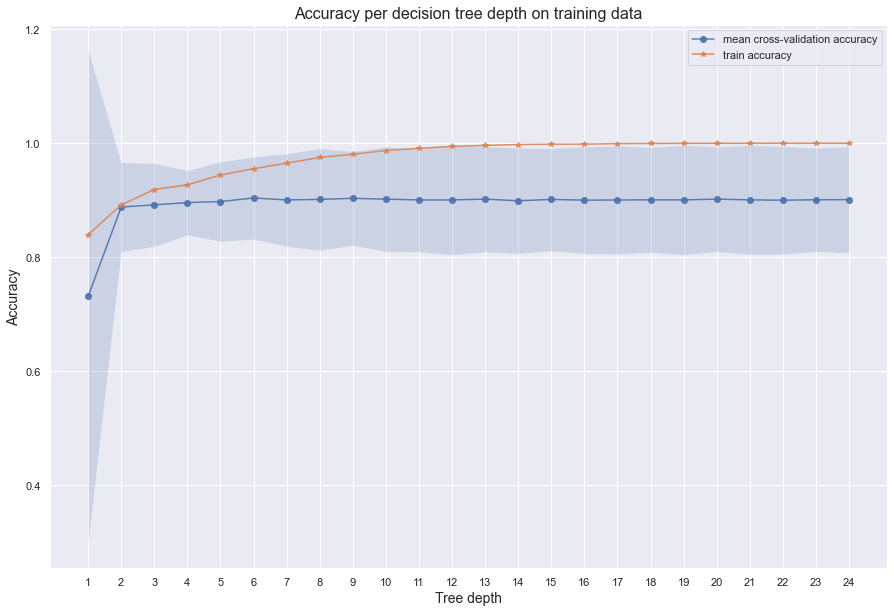

In [78]:
plot_cross_val_tree(td, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [79]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0, max_leaf_nodes=25)

In [80]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25, random_state=0)

In [162]:
dtreey_test_pred = dtree.predict(X_test)

In [82]:
y_train_pred = dtree.predict(X_train)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
cm_train = confusion_matrix(Y_train, y_train_pred,labels=dtree.classes_)
cm_test = confusion_matrix(Y_test, y_test_pred,labels=dtree.classes_)

In [84]:
cm_train

array([[7395,  255],
       [ 258, 1206]], dtype=int64)

In [85]:
cm_test

array([[817,  33],
       [ 37, 126]], dtype=int64)

In [165]:
print("Classification report: ")
rep = classification_report(Y_test,y_test_pred)
print(rep)
print('Accuracy: ')
print(dtree.score(X_test,Y_test))

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       850
           1       0.79      0.77      0.78       163

    accuracy                           0.93      1013
   macro avg       0.87      0.87      0.87      1013
weighted avg       0.93      0.93      0.93      1013

Accuracy: 
0.930898321816387


In [167]:
dtree_f1score ={'0': 0.96,'1':0.77}
dtree_prec = {'0':0.96,'1':0.79}


In [177]:
dtree_cval = cross_val_score(dtree,X_test,Y_test,scoring='accuracy')
dtree_cross_val = dtree_cval.mean()
dtree_cross_val

0.8845095839633224

In [87]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=dtree.classes_)

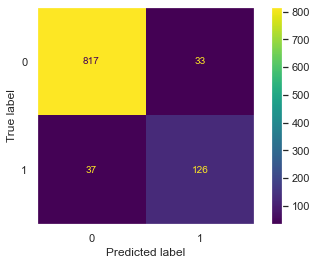

In [89]:
disp.plot()
plt.grid(False)

In [90]:
dt_params = {'max_depth':range(0,30),'max_leaf_nodes':range(0,30),'min_samples_split': [2, 3, 4]}

In [91]:
dtc_search = DecisionTreeClassifier(random_state=0)

In [93]:
from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(dtc_search, dt_params, verbose=1, cv=3)

In [94]:
dt_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(0, 30),
                         'max_leaf_nodes': range(0, 30),
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [95]:
dt_grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 16, 'min_samples_split': 2}

In [96]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=16, random_state=0)

In [97]:
dt_grid.best_score_

0.7026552556506473

#### Final score of Decision Tree is 93.83% on the test data

# kNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score

In [99]:
model2 = KNeighborsClassifier()

In [100]:
model2.fit(X_train,Y_train)
x_pred = model2.predict(X_test) 
x_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [101]:
kNN_score = model2.score(X_test,Y_test)

In [102]:
def elbow(k):
    test_error = []
    for i in k:
        test_model = KNeighborsClassifier(n_neighbors=i)
        test_model.fit(X_train,Y_train)
        pred_i = test_model.predict(X_test)
        test_error.append(np.mean(pred_i != Y_test))
    return test_error

In [103]:
k = range(1,100)

In [104]:
test_model = elbow(k)

Text(0.5, 1.0, 'Elbow curve')

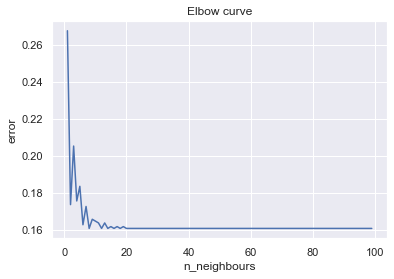

In [105]:
plt.plot(k,test_model)
plt.xlabel('n_neighbours')
plt.ylabel('error')
plt.title('Elbow curve')

In [106]:
kNN_score

0.8163869693978283

In [107]:
KNN_score =kNN_score

In [108]:
knn_y_train_pred = model2.predict(X_train)
knn_y_test_pred = model2.predict(X_test)

In [109]:
knn_cm_train = confusion_matrix(Y_train, knn_y_train_pred,labels=model2.classes_)
knn_cm_test = confusion_matrix(Y_test, knn_y_test_pred,labels=model2.classes_)

In [110]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm_test,display_labels=model2.classes_)

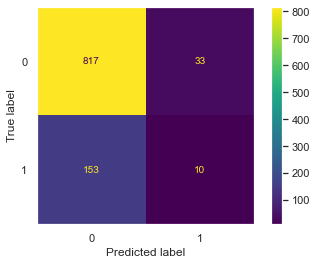

In [111]:
disp.plot()
plt.grid(False)

In [112]:
print("Classification report: ")
rep = classification_report(Y_test,knn_y_test_pred)
print(rep)

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       850
           1       0.23      0.06      0.10       163

    accuracy                           0.82      1013
   macro avg       0.54      0.51      0.50      1013
weighted avg       0.74      0.82      0.77      1013



In [178]:
knn_cval = cross_val_score(model2,X_test,Y_test,scoring='accuracy')
knn_cross_val = knn_cval.mean()
knn_cross_val

0.8005950348729455

In [216]:
knn_f1score = {'0':0.90,'1':0.10}
knn_prec = {'0':0.84,'1':0.23}

In [113]:
knn_estimate = KNeighborsClassifier()

In [114]:
parameters_KNN = {'n_neighbors': [1,100, 1],'p': [1,2],'weights': ['uniform', 'distance'],'metric': ['minkowski', 'chebyshev']}

In [115]:
grid_search_KNN = GridSearchCV(
    estimator=knn_estimate,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [116]:
grid_search_KNN.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': [1, 100, 1], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [117]:
grid_search_KNN.best_params_

{'metric': 'minkowski', 'n_neighbors': 100, 'p': 1, 'weights': 'uniform'}

In [118]:
grid_search_KNN.best_estimator_

KNeighborsClassifier(n_neighbors=100, p=1)

In [119]:
grid_search_KNN.best_score_

0.8393680456997519

#### FInal score of kNN is 81.49%

# Random-Forest classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
RFC = RandomForestClassifier()

In [122]:
RFC.fit(X_train,Y_train)


RandomForestClassifier()

In [123]:
RFC.score(X_test,Y_test)

0.9545903257650543

In [124]:
RFC_score = RFC.score(X_test,Y_test)

In [125]:
RFC.score(X_train,Y_train)

1.0

In [126]:
RFC.feature_importances_

array([0.02874966, 0.01384265, 0.0259527 , 0.06291066, 0.02527649,
       0.02809922, 0.0356074 , 0.09972518, 0.03453338, 0.06283927,
       0.16151385, 0.16644348, 0.10592459, 0.05853882, 0.00632633,
       0.00393981, 0.00498428, 0.00365356, 0.00736056, 0.00693548,
       0.00248057, 0.00216015, 0.00386735, 0.00358014, 0.00195771,
       0.00333463, 0.00350278, 0.00219036, 0.00626504, 0.00546513,
       0.00211415, 0.00317712, 0.0031495 , 0.0029731 , 0.0035719 ,
       0.00249671, 0.00166431, 0.00099587, 0.00022095, 0.00167517])

In [127]:
feat_importances = pd.Series(RFC.feature_importances_, index=X.columns)

In [128]:
import time
import numpy as np

start_time = time.time()
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.034 seconds


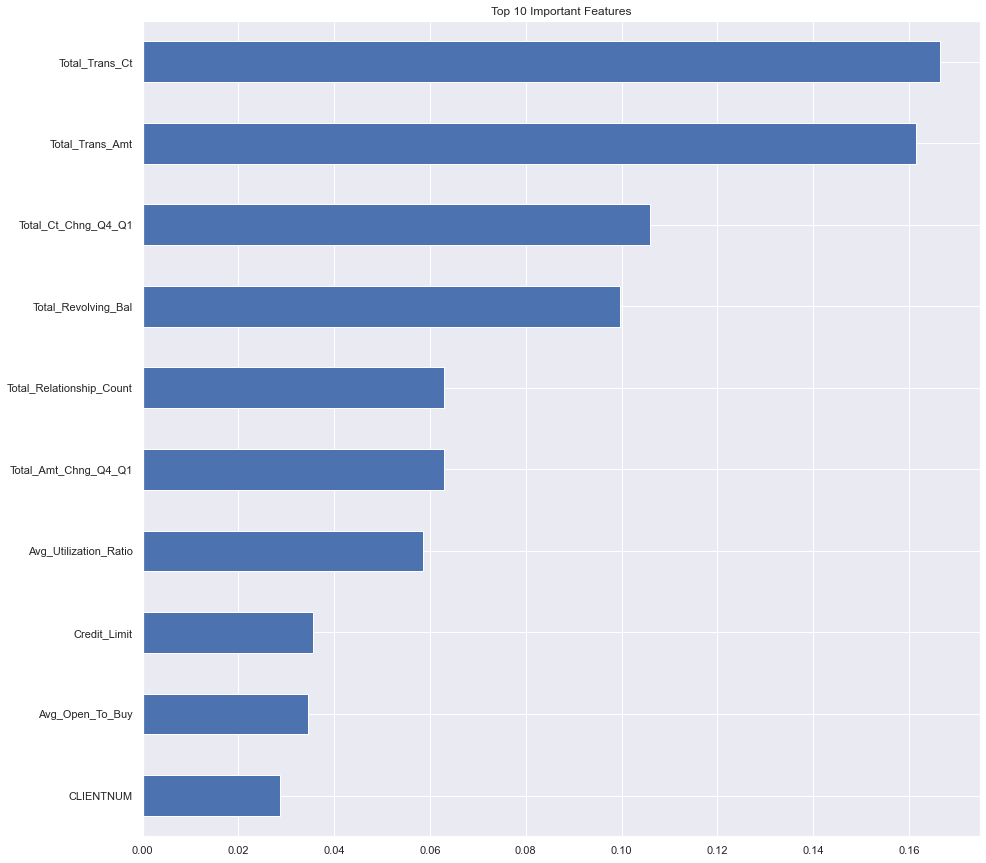

In [129]:
fig, ax = plt.subplots(figsize=(15,15))
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


#### Final score of Random-Forest Classifier on test data is 95.11%

In [130]:
rf_y_test_pred = RFC.predict(X_test)

In [131]:
rf_y_train_pred = RFC.predict(X_train)

In [132]:
rf_cm_train = confusion_matrix(Y_train, rf_y_train_pred,labels=RFC.classes_)
rf_cm_test = confusion_matrix(Y_test, rf_y_test_pred,labels=RFC.classes_)

In [133]:
print('Training confusion matrix:')
print(rf_cm_train)

Training confusion matrix:
[[7650    0]
 [   0 1464]]


In [134]:
print('Test confusion matrix:')
print(rf_cm_test)

Test confusion matrix:
[[837  13]
 [ 33 130]]


In [135]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm_test,display_labels=RFC.classes_)

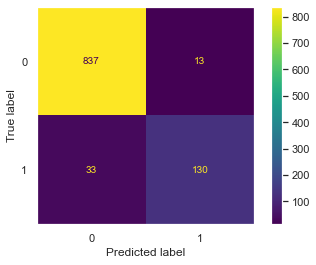

In [136]:
disp.plot()
plt.grid(False)

In [137]:
rfc_rep = classification_report(Y_test,rf_y_test_pred)

In [138]:
print("RFC performance report:")
print(rfc_rep)

RFC performance report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       850
           1       0.91      0.80      0.85       163

    accuracy                           0.95      1013
   macro avg       0.94      0.89      0.91      1013
weighted avg       0.95      0.95      0.95      1013



In [169]:
rfc_f1score = {'0':0.97,'1':0.85}
rfc_prec = {'0':0.96,'1':0.91}

In [180]:
rfc_cval = cross_val_score(RFC,X_test,Y_test,scoring='accuracy')
rfc_cross_val = rfc_cval.mean()
rfc_cross_val

0.9002584987562795

In [139]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [140]:
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [141]:
rfc_grid.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [142]:
rfc_grid.best_params_

{'max_features': 'auto', 'n_estimators': 200}

In [143]:
rfc_grid.best_estimator_

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True)

In [144]:
rfc_grid.best_score_

0.9217606712136

# SVM

In [145]:
from sklearn import svm

In [146]:
model3 = svm.SVC(C = 1.0, kernel='rbf', gamma ='scale', random_state=None)

In [147]:
model3.fit(X_train,Y_train)
svc_y_train_pred = model3.predict(X_train)
svc_y_test_pred = model3.predict(X_test)

In [182]:
SVM_score = model3.score(X_test,Y_test)

In [149]:
svc_cm_train = confusion_matrix(Y_train, svc_y_train_pred,labels=model3.classes_)
svc_cm_test = confusion_matrix(Y_test, svc_y_test_pred,labels=model3.classes_)

In [150]:
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm_test,display_labels=model3.classes_)

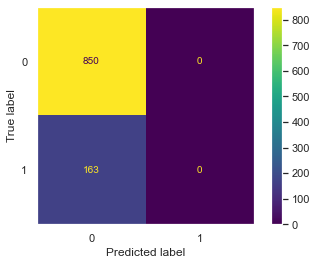

In [151]:
disp.plot()
plt.grid(False)

In [152]:
svc_rep = classification_report(Y_test,svc_y_test_pred)
print("Classification report for SVC: ")
print(svc_rep)

Classification report for SVC: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       850
           1       0.00      0.00      0.00       163

    accuracy                           0.84      1013
   macro avg       0.42      0.50      0.46      1013
weighted avg       0.70      0.84      0.77      1013



In [168]:
svm_f1score = {'0':0.91,'1':0.00}
svm_prec = {'0':0.84,'1':0.00}

In [181]:
svm_cval = cross_val_score(model3,X_test,Y_test,scoring='accuracy')
svm_cross_val = svm_cval.mean()
svm_cross_val

0.8390967175535288

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

In [155]:
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

In [156]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=  16.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=  15.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=  15.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=  16.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=  15.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=  15.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=  15.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=  17.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=  16.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=  15.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.839 total time=  17.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.839 total time=  15.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.839 total time=  15.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.839 total time=  14.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.840 total time=  16.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.839 total time=  15.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.839 total time=  14.9s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.839 total time=  15.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.839 total time=  15.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.840 total time=  15.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.839 total time=  15.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.839 total time=  15.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.839 total time=  15.5s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [157]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [158]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1)


# Comparing all model scores

In [183]:
model_scores = {"Support_Vector_Machine":SVM_score,
                "Random_Forest_Classifier":RFC_score,
                "k_Nearest_Neighbours":KNN_score,
                "Decision_Tree":DT_score}

In [184]:
keys = model_scores.keys()
values = model_scores.values()

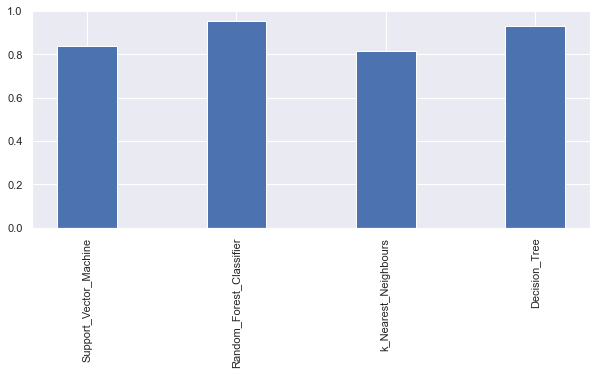

In [203]:
plt.figure(figsize=(10,4))
plt.bar(keys,values,width=0.4)
plt.xticks(rotation=90)
plt.show()


In [186]:
print('Model                 Scores')
for m,s in model_scores.items():
    print('{} {}'.format(m, s))

Model                 Scores
Support_Vector_Machine 0.8390918065153011
Random_Forest_Classifier 0.9545903257650543
k_Nearest_Neighbours 0.8163869693978283
Decision_Tree 0.930898321816387


In [187]:
model_cross_val_scores= {"Support_Vector_Machine":svm_cross_val,
                "Random_Forest_Classifier":rfc_cross_val,
                "k_Nearest_Neighbours":knn_cross_val,
                "Decision_Tree":dtree_cross_val}

In [188]:
keys = model_scores.keys()
values = model_scores.values()

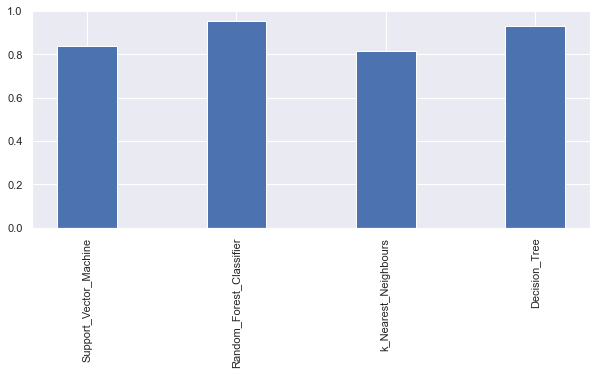

In [204]:
plt.figure(figsize=(10,4))
plt.bar(keys,values,width=0.4)
plt.xticks(rotation=90)
plt.show()

In [202]:
print(svm_f1score,knn_f1score,dtree_f1score,rfc_f1score)

{'0': 0.91, '1': 0.0} {'0': 0.9, '1': '0.10'} {'0': 0.96, '1': 0.77} {'0': 0.97, '1': 0.85}


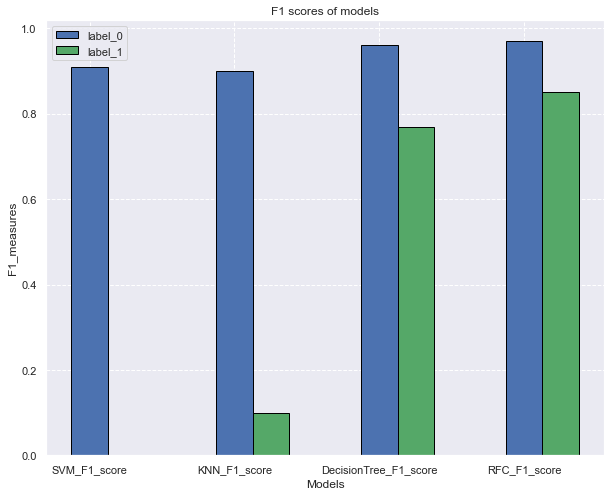

In [223]:
X = ['SVM_F1_score','KNN_F1_score','DecisionTree_F1_score','RFC_F1_score']
label_0 = [svm_f1score['0'],knn_f1score['0'],dtree_f1score['0'],rfc_f1score['0']]
label_1 = [svm_f1score['1'],knn_f1score['1'],dtree_f1score['1'],rfc_f1score['1']]
n = 4  
X_axis = np.arange(n)
width = 0.25  
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

figure1 = plt.bar(X_axis, label_0, color = 'b',
        width = width, edgecolor = 'black',
        label='label_0')
figure2 = plt.bar(X_axis + width, label_1, color = 'g',
        width = width, edgecolor = 'black',
        label='label_1')

plt.grid(linestyle='--')
plt.xticks(X_axis + width/2,X)
plt.legend()
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("F1_measures")
plt.title("F1 scores of models")
plt.legend()


plt.show()

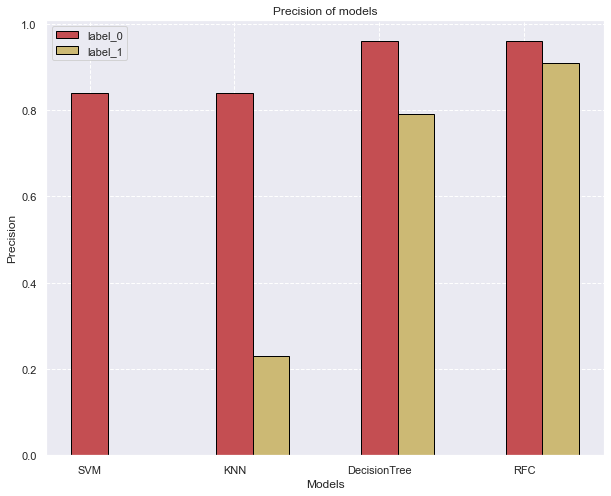

In [225]:
X = ['SVM','KNN','DecisionTree','RFC']
label_0 = [svm_prec['0'],knn_prec['0'],dtree_prec['0'],rfc_prec['0']]
label_1 = [svm_prec['1'],knn_prec['1'],dtree_prec['1'],rfc_prec['1']]
n = 4  
X_axis = np.arange(n)
width = 0.25  
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

figure1 = plt.bar(X_axis, label_0, color = 'r',
        width = width, edgecolor = 'black',
        label='label_0')
figure2 = plt.bar(X_axis + width, label_1, color = 'y',
        width = width, edgecolor = 'black',
        label='label_1')

plt.grid(linestyle='--')
plt.xticks(X_axis + width/2,X)
plt.legend()
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Precision of models")
plt.legend()


plt.show()